# <font color=blue > Name : </font>     <font color=green > Mohammed  Basheer </font> 
# <font color=blue > University  : </font>     <font color=green > University College of Applied Sciences<font color=Orange >  "UCAS" </font> 

___________________________________________________________________________________________________________________________

# <font color=Orange > The Titanic Survivor Dataset : </font> 

____________________________________________________________________________________________________________________________

# Import the libraries 

In [1]:
# Import pandas.
import pandas as pd

# Import numpy.
import numpy as np

# Import matplotlib.
import matplotlib.pyplot as plt

# Import seaborn.
import seaborn as sns

# Import regular expression.
import re

# import datetime.
import datetime as dt

#import seaborn 
import seaborn as sns

#import plotly 

import plotly.graph_objects as go

import plotly.express as px

from plotly.subplots import make_subplots

ModuleNotFoundError: No module named 'matplotlib'

# Explore the data

In [189]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,NaN,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C


In [191]:
# #shows dataframe size - rows, columns

df.shape

(891, 12)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [193]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [194]:
df.isna().sum().any()

True

In [195]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [196]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [197]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [198]:
df[df['Sex']=='female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [199]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

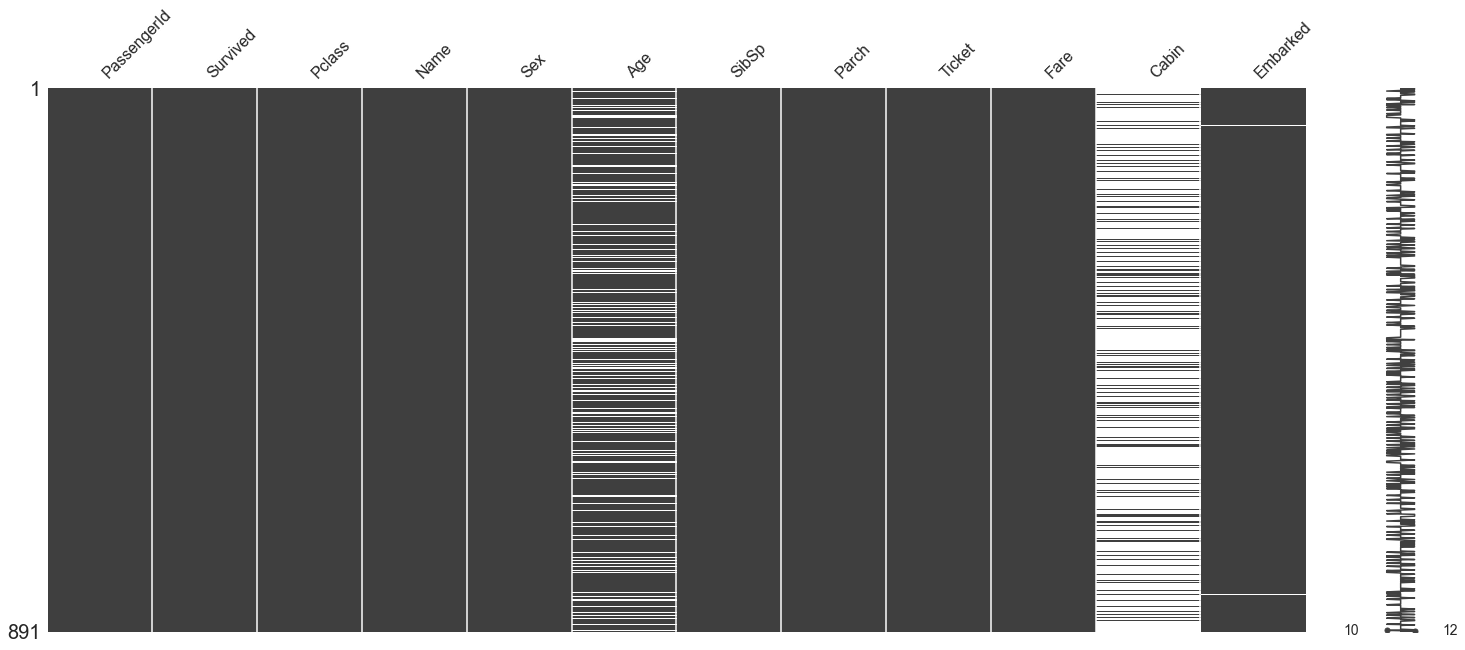

In [200]:
import missingno as ms

ms.matrix(df)

# <font color=green > EDA  </font> 

In [201]:
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])



fig.add_trace(
            go.Pie(labels=train.loc[train['Embarked'] == 'C']['Survived'], pull = [.1, .1],
                   title = 'Embarked C vs. Survived'), row=1, col=1)

fig.add_trace(
            go.Pie(labels=train.loc[train['Embarked'] == 'S']['Survived'], pull = [.07, .07],
                   title = 'Embarked S vs. Survived'),row=1, col=2)

fig.add_trace(
            go.Pie(labels=train.loc[train['Embarked'] == 'Q']['Survived'], pull = [.1, .1],
                   title = 'Embarked Q vs. Survived'), row=1, col=3)


fig.update_layout(height=500, width=800, title_text="Gene Expression Features")
fig.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

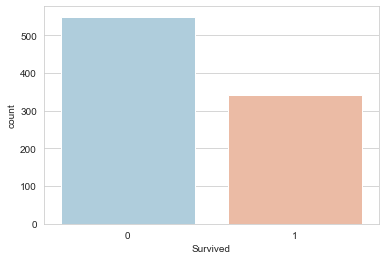

In [202]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

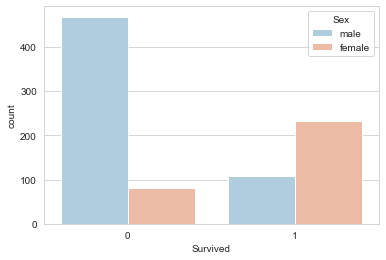

In [203]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

In [204]:
fig = px.histogram(df, x='Age', nbins=30, marginal='box')
fig.show()

In [205]:
fig = px.histogram(df, x='Age', nbins=50, histnorm='probability density')
fig.show()

In [206]:
fig = px.box(df, x='Pclass', y="Age")
fig.show()

In [207]:
fig = px.box(df, x='Pclass', y="Age", points="all")
fig.show()

In [208]:
fig = px.box(df, x='Pclass', y="Age", notched=True, color="Survived")
fig.show()

In [209]:
fig = px.violin(df, y="Age", points="all")
fig.show()

In [210]:
fig = px.violin(df, x='Sex', y="Age", color='Survived', points="all")
fig.show()

In [211]:
fig = px.violin(df, x='Pclass', y="Age", color='Survived', box=True)
fig.show()

In [212]:
fig = px.violin(df, x='Pclass', y="Age", color='Survived', violinmode='overlay')
fig.show()

In [213]:
fig = px.strip(df, x='Pclass', y="Age", color='Survived')
fig.show()

In [214]:
fig = px.strip(df, x='Sex', y="Age", color='Survived', stripmode="overlay")
fig.show()

In [215]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [216]:
fig = px.density_heatmap(df, x="Embarked", y="Pclass",
                        height=500, width=500)
fig.show()

In [217]:
fig = px.imshow(df.corr(method='pearson'), 
                title='Correlations Among Training Features',
                height=700, width=700)
fig.show()

In [218]:
fig = px.density_contour(df, x="SibSp", y="Parch",
                         height=400, width=800)
fig.show()

In [219]:
fig = px.density_contour(df, x="SibSp", y="Parch", color='Survived',
                         height=400, width=800)
fig.show()

In [220]:
fig = px.density_contour(df, x="SibSp", y="Parch", color='Survived',
                        height=400, width=800)
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

In [221]:
fig = px.scatter_3d(df, x='Pclass', y='Fare', z='Age',
              color='Survived')
fig.show()

The average age for each of the classes are estimated to be as follows:
  
  * For **Class 1** - The median age is 37
  * For **Class 2** - The median age is 29
  * For **Class 3** - The median age is 24
  
Let's impute these values into the age column.

In [222]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        # Class-1
        if Pclass == 1:
            return 37
        # Class-2 
        elif Pclass == 2:
            return 29
        # Class-3
        else:
            return 24

    else:
        return Age

In [223]:
train_data = pd.read_csv("Titanic-Dataset.csv")


In [224]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

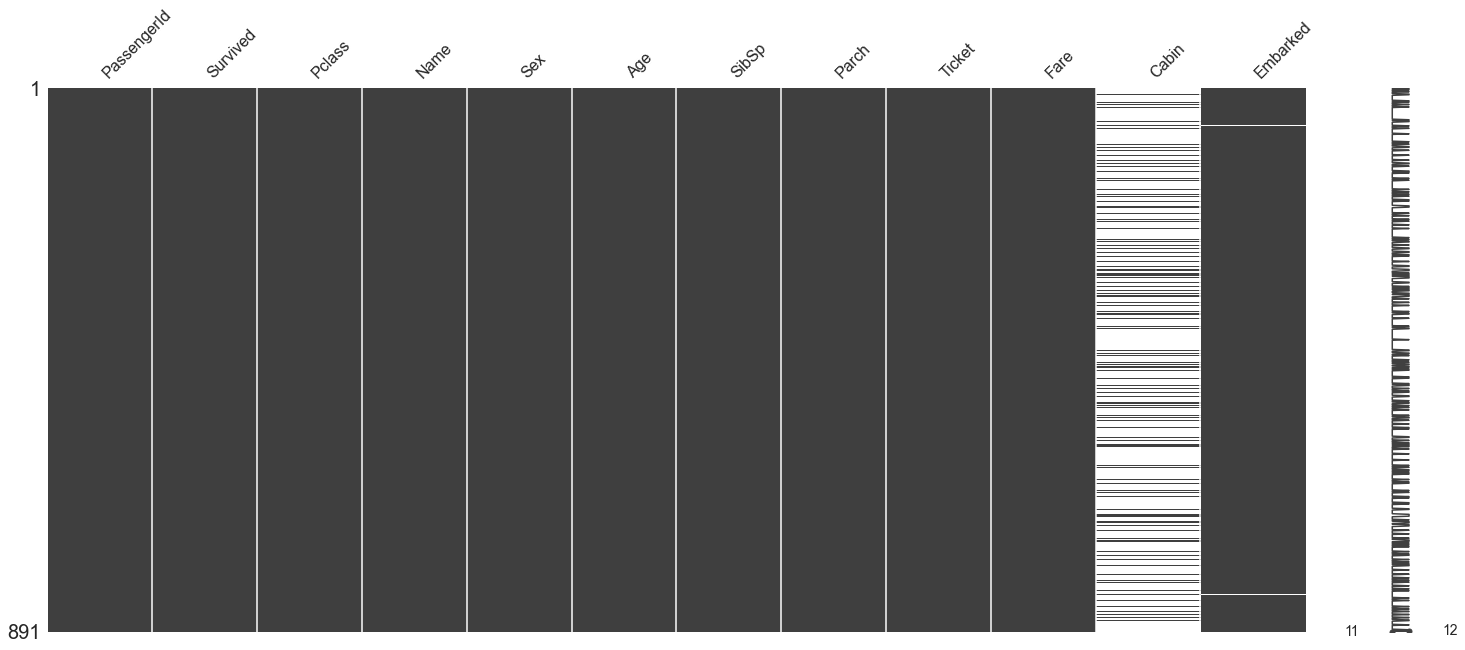

In [225]:
ms.matrix(train_data)

In [226]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [227]:
train_data.drop('Cabin', axis = 1,inplace=True)

In [228]:
train_data.shape

(891, 11)

<AxesSubplot:>

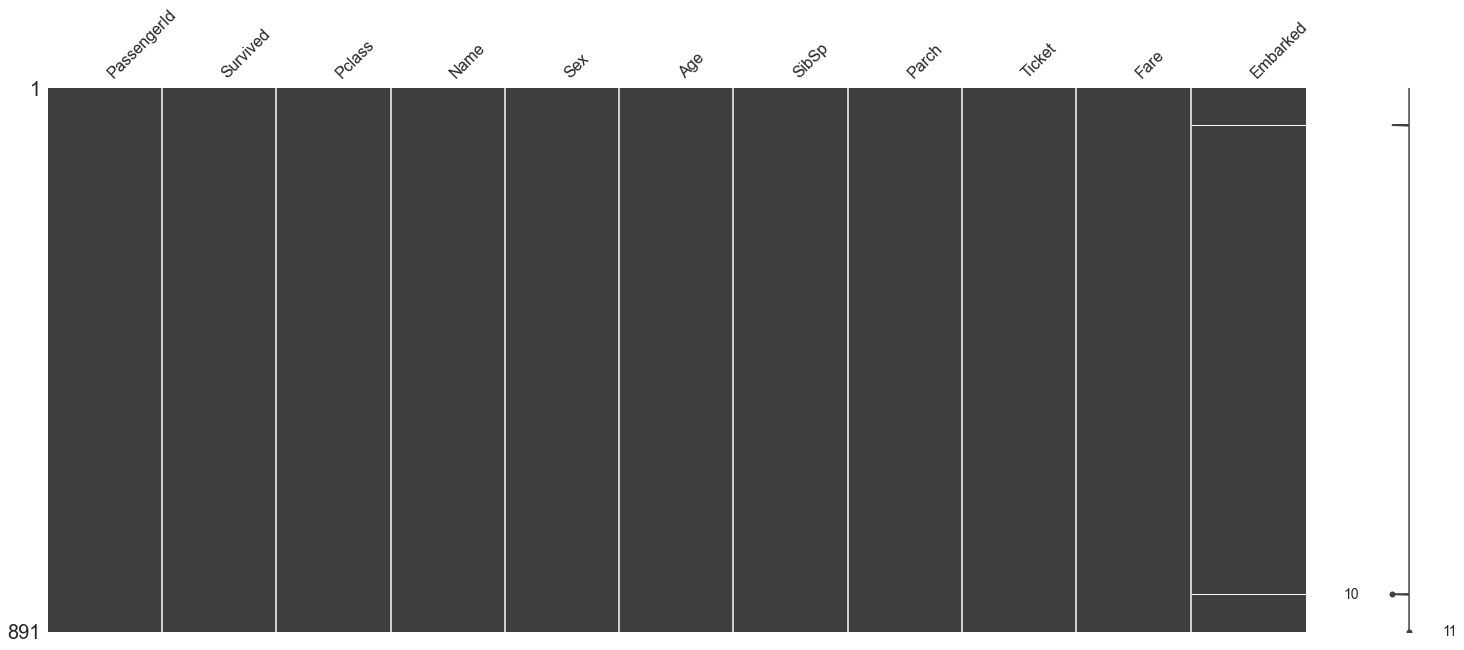

In [229]:
ms.matrix(train_data)

In [230]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [231]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [232]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [233]:
train_data.fillna(train_data['Fare'].mean(),inplace=True)

In [234]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [235]:
old_data = train_data.copy()
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [236]:
train_data = pd.concat([train_data,sex,embark],axis=1)
 

# **Build  Model**

In [185]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.3, 
                                                    random_state=42)

In [186]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 11)
(623,)
(268, 11)
(268,)


# **Logistic Regression**